# IT market analysis 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [2]:
#zapytanie SQL zapisane w postaci zmiennej tekstopwej query1
query1 = """SELECT
  EXTRACT(YEAR FROM creation_date) AS Year,
  COUNT(*) AS Number_of_Questions,
  SUM(answer_count) AS Question_Answers,
  COUNT(case answer_count when 0 then 1 else null end) AS Not_Answered_Questions
FROM
  `bigquery-public-data.stackoverflow.posts_questions`
GROUP BY
  Year
HAVING
  Year >= 2008 AND Year <= 2018
ORDER BY
  Year; """


In [3]:
# jednorazowo będzie potrzebne podanie kodu weryfikacyjnego
df1 = pd.read_gbq(query = query1, project_id = 'it-market-analysis', dialect = 'standard')

In [4]:
df1

,Year,Number_of_Questions,Question_Answers,Not_Answered_Questions
0,2008,58153,311835,68
1,2009,343139,1148668,1195
2,2010,693332,1722921,6514
3,2011,1198587,2532982,33641
4,2012,1642687,3008800,89140
5,2013,2056613,3407852,172063
6,2014,2160361,3171678,248374
7,2015,2214389,3042724,301383
8,2016,2219199,2907726,342236
9,2017,2137687,2656670,368978


In [5]:
query2 = """SELECT 
    EXTRACT(YEAR FROM creation_date) AS Year,
    COUNT(CASE WHEN tags = "java" or tags LIKE "%|java|%" or 
    SUBSTR(tags,1,5) = "java|" or SUBSTR(tags, -5) = "|java" THEN 1 ELSE NULL END) AS Java,
    COUNT(CASE WHEN tags = "python" or tags LIKE "%|python|%" or 
    SUBSTR(tags,1,7) = "python|" or SUBSTR(tags, -7) = "|python" THEN 1 ELSE NULL END) AS Python,
    COUNT(CASE WHEN tags = "c#" or tags LIKE "%|c#|%" or 
    SUBSTR(tags,1,3) = "c#|" or SUBSTR(tags, -3) = "|c#" THEN 1 ELSE NULL END) AS CSharp,
    COUNT(CASE WHEN tags = "c" or tags LIKE "%|c|%" or 
    SUBSTR(tags,1,2) = "c|" or SUBSTR(tags, -2) = "|c" THEN 1 ELSE NULL END) AS C,
    COUNT(CASE WHEN tags = "c++" or tags LIKE "%|c++|%" or 
    SUBSTR(tags,1,4) = "c++|" or SUBSTR(tags, -4) = "|c++" THEN 1 ELSE NULL END) AS CPlusPlus,
    COUNT(CASE WHEN tags = "r"  or tags LIKE "%|r|%" or 
    SUBSTR(tags,1,2) = "r|" or SUBSTR(tags, -2) = "|r" THEN 1 ELSE NULL END) AS R,
    COUNT(CASE WHEN tags = "javascript" or tags LIKE "%|javascript|%" or 
    SUBSTR(tags,1,11) = "javascript|" or SUBSTR(tags, -11) = "|javascript" THEN 1 ELSE NULL END) AS JavaScript,
    COUNT(CASE WHEN tags = "ruby" or tags LIKE "%|ruby|%" or 
    SUBSTR(tags,1,5) = "ruby|" or SUBSTR(tags, -5) = "|ruby" THEN 1 ELSE NULL END) AS Ruby,
    COUNT(CASE WHEN tags = "go" or tags LIKE "%|go|%" or 
    SUBSTR(tags,1,3) = "go|" or SUBSTR(tags, -3) = "|go" THEN 1 ELSE NULL END) AS Go,
    COUNT(CASE WHEN tags = "swift"or tags LIKE "%|swift|%" or 
    SUBSTR(tags,1,6) = "swift|" or SUBSTR(tags, -6) = "|swift" THEN 1 ELSE NULL END) AS Swift
    FROM `bigquery-public-data.stackoverflow.posts_questions`
    GROUP BY Year
    HAVING Year >= 2008 AND Year <= 2018
    ORDER BY Year"""


In [6]:
df2 = pd.read_gbq(query = query2, project_id = 'it-market-analysis', dialect = 'standard')

In [7]:
df2

,Year,Java,Python,CSharp,C,CPlusPlus,R,JavaScript,Ruby,Go,Swift
0,2008,4303,2074,7473,1153,3108,8,2732,935,0,0
1,2009,23971,12895,46028,6767,15704,524,18712,5203,77,7
2,2010,54456,27059,75443,15301,31995,2264,43383,10176,150,12
3,2011,99339,42268,113269,22627,48107,5839,90244,18784,362,48
4,2012,145436,64399,139138,31081,63363,12213,136808,24464,925,58
5,2013,191789,96731,166114,40798,82489,22305,196856,29362,2101,58
6,2014,218494,116789,163734,42002,83065,30985,237075,30100,3998,15251
7,2015,216276,137625,155496,40219,80123,40789,256644,28066,5175,50034
8,2016,197888,159065,149699,34732,71825,44504,265295,24119,6512,56621
9,2017,175591,192944,132493,30801,62439,51238,251284,17359,7095,48555


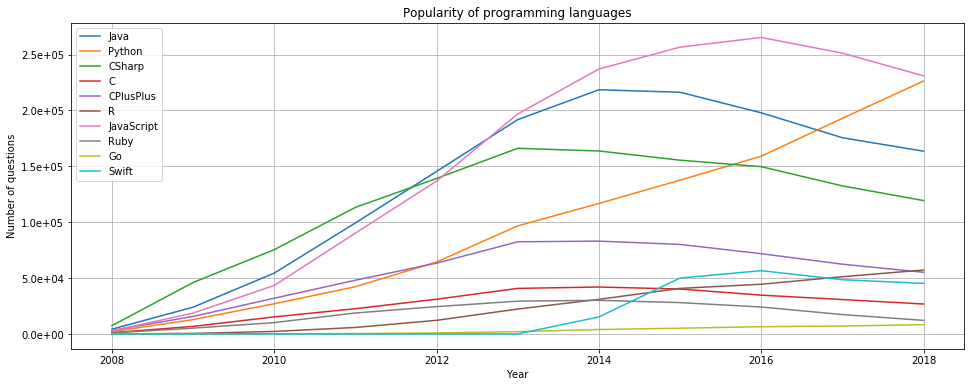

In [8]:
languagesList = list(df2)
allTags = []

plt.rcParams["figure.figsize"] = "16, 6"
fig = plt.figure()
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

for i in range(1, len(df2)):
    plt.plot(df2["Year"], df2[languagesList[i]], label = languagesList[i])
    allTags.append([languagesList[i], sum(df2[languagesList[i]])]) # przyda się do sprawdzenia późniejszych obliczeń


plt.title("Popularity of programming languages")
plt.ylabel("Number of questions")
plt.xlabel("Year")
plt.legend()
plt.grid(True)


In [9]:
query3 = """
SELECT
tags AS Tags,
COUNT(*) AS Counter,
SUM(answer_count) AS Answers,
SUM(answer_count)/COUNT(*) AS AnswerRate
FROM `bigquery-public-data.stackoverflow.posts_questions`,
UNNEST(split(tags,'|')) Tags 
WHERE(EXTRACT(YEAR FROM creation_date) < 2019 AND tags in("java", "python", 
"c#", "c", "c++", "r", "javascript", "ruby", "go", "swift"))
GROUP BY Tags
ORDER BY Counter DESC
LIMIT 30
"""

In [10]:
df3 = pd.read_gbq(query = query3, project_id = 'it-market-analysis', dialect = 'standard')

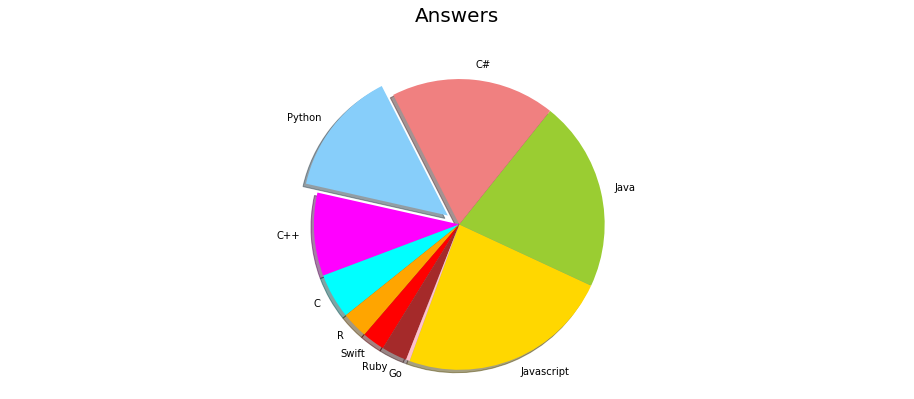

In [11]:
labels = [x[0].upper() + x[1:] for x in df3["Tags"]]
sizes = df3["Answers"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'magenta', 'cyan', 'orange', 'red', 
         'brown', 'pink']
explode = (0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.rcParams["figure.figsize"] = "16, 6"
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
 shadow=True, startangle=250)
plt.title("Answers", pad = 40, fontsize = 20)
plt.axis('equal')
plt.show()

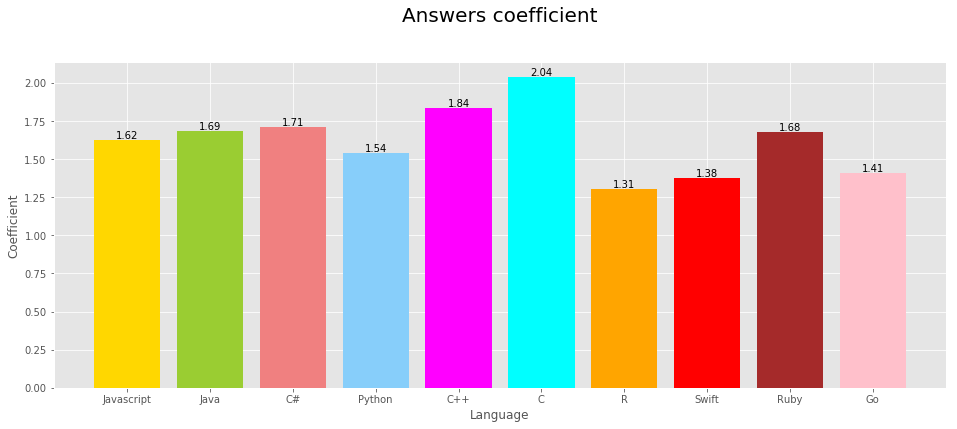

In [12]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = "16, 6"
values = df3["AnswerRate"]
x_pos = [i for i, _ in enumerate(labels)]

plt.bar(x_pos, values, color=colors, label = labels )
plt.xlabel("Language")
plt.ylabel("Coefficient")
plt.title("Answers coefficient", pad = 40, fontsize = 20)
for i in range(len(labels)):
    plt.text(x_pos[i], values[i] + 0.01 , "{:.2f}".format(values[i]), horizontalalignment='center')
plt.xticks(x_pos, labels)
plt.show()

In [13]:
query4 = """
SELECT
tags AS Tags,
COUNT(*) AS Counter
FROM `bigquery-public-data.stackoverflow.posts_questions`,
UNNEST(split(tags,'|')) Tags
WHERE(EXTRACT(YEAR FROM creation_date) < 2019)
GROUP BY Tags
ORDER BY Counter DESC
LIMIT 30
"""

In [14]:
df4 = pd.read_gbq(query = query4, project_id = 'it-market-analysis', dialect = 'standard')

In [15]:
df4

,Tags,Counter
0,javascript,1729988
1,java,1491092
2,c#,1268247
3,php,1246466
4,android,1155708
5,python,1078132
6,jquery,936753
7,html,792053
8,c++,597443
9,ios,584548


In [16]:
allTags # Jak widać wszystko się zgadza

[['Java', 1491092],
 ['Python', 1078132],
 ['CSharp', 1268247],
 ['C', 292286],
 ['CPlusPlus', 597443],
 ['R', 267883],
 ['JavaScript', 1729988],
 ['Ruby', 200746],
 ['Go', 34742],
 ['Swift', 215871]]

In [17]:
query5 = """
SELECT
COUNT(CASE WHEN reputation < 10 THEN 1 ELSE NULL END) AS NewUser,
COUNT(CASE WHEN reputation > 10 AND reputation < 200  THEN 1 ELSE NULL END) AS RemoveRestrictions,
COUNT(CASE WHEN reputation > 200 AND reputation < 1000 THEN 1 ELSE NULL END) AS ReduceAds,
COUNT(CASE WHEN reputation > 1000 AND reputation < 20000 THEN 1 ELSE NULL END) AS EstabilishedUser,
COUNT(CASE WHEN reputation > 2000 AND reputation < 25000 THEN 1 ELSE NULL END) AS TrustedUser,
COUNT(CASE WHEN reputation > 25000 THEN 1 ELSE NULL END) AS AccesToSiteAnalytics,
COUNT (*) as Total
FROM `bigquery-public-data.stackoverflow.users`

"""

In [18]:
df5 = pd.read_gbq(query = query5, project_id = 'it-market-analysis', dialect = 'standard')

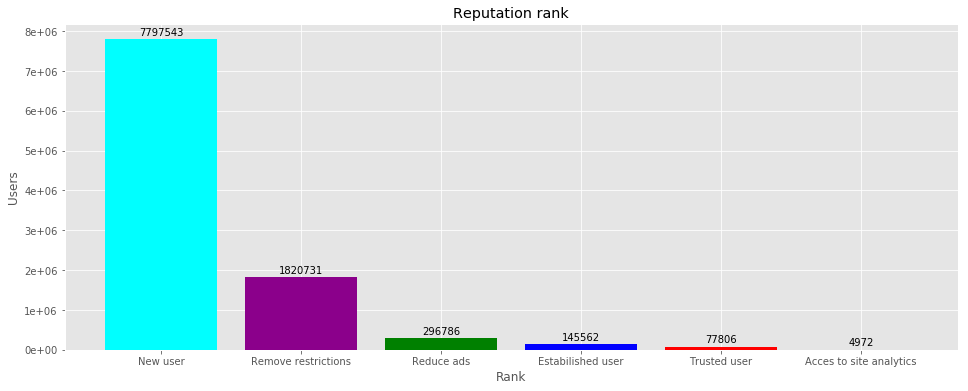

In [19]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = "16, 6"
x = ['New user', 'Remove restrictions', 'Reduce ads', 'Estabilished user', 'Trusted user', 'Acces to site analytics']
values = list(df5.loc[0])[:len(list(df5))-1]

x_pos = [i for i, _ in enumerate(x)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.0e'))

plt.bar(x_pos, values, color=["cyan", "darkmagenta","green", "blue","red", "purple"], label =x )
plt.xlabel("Rank")
plt.ylabel("Users")
plt.title("Reputation rank")
for i in range(len(x)):
    plt.text(x_pos[i], values[i] + list(df5.loc[0])[-1]/100 , values[i], horizontalalignment='center')
plt.xticks(x_pos, x)
plt.show()